# Cas Kaggle Alvaro Ruiz 1708026

### 1. Introducció
La diabetis és una de les malalties cròniques més prevalents a nivell mundial, i la seva detecció precoç és clau per evitar complicacions greus de salut. En l'era del Big Data, l'ús de tècniques d'Aprenentatge Computacional (Machine Learning) ofereix una oportunitat única per donar suport als professionals mèdics en el diagnòstic, identificant patrons complexos en les dades clíniques dels pacients.

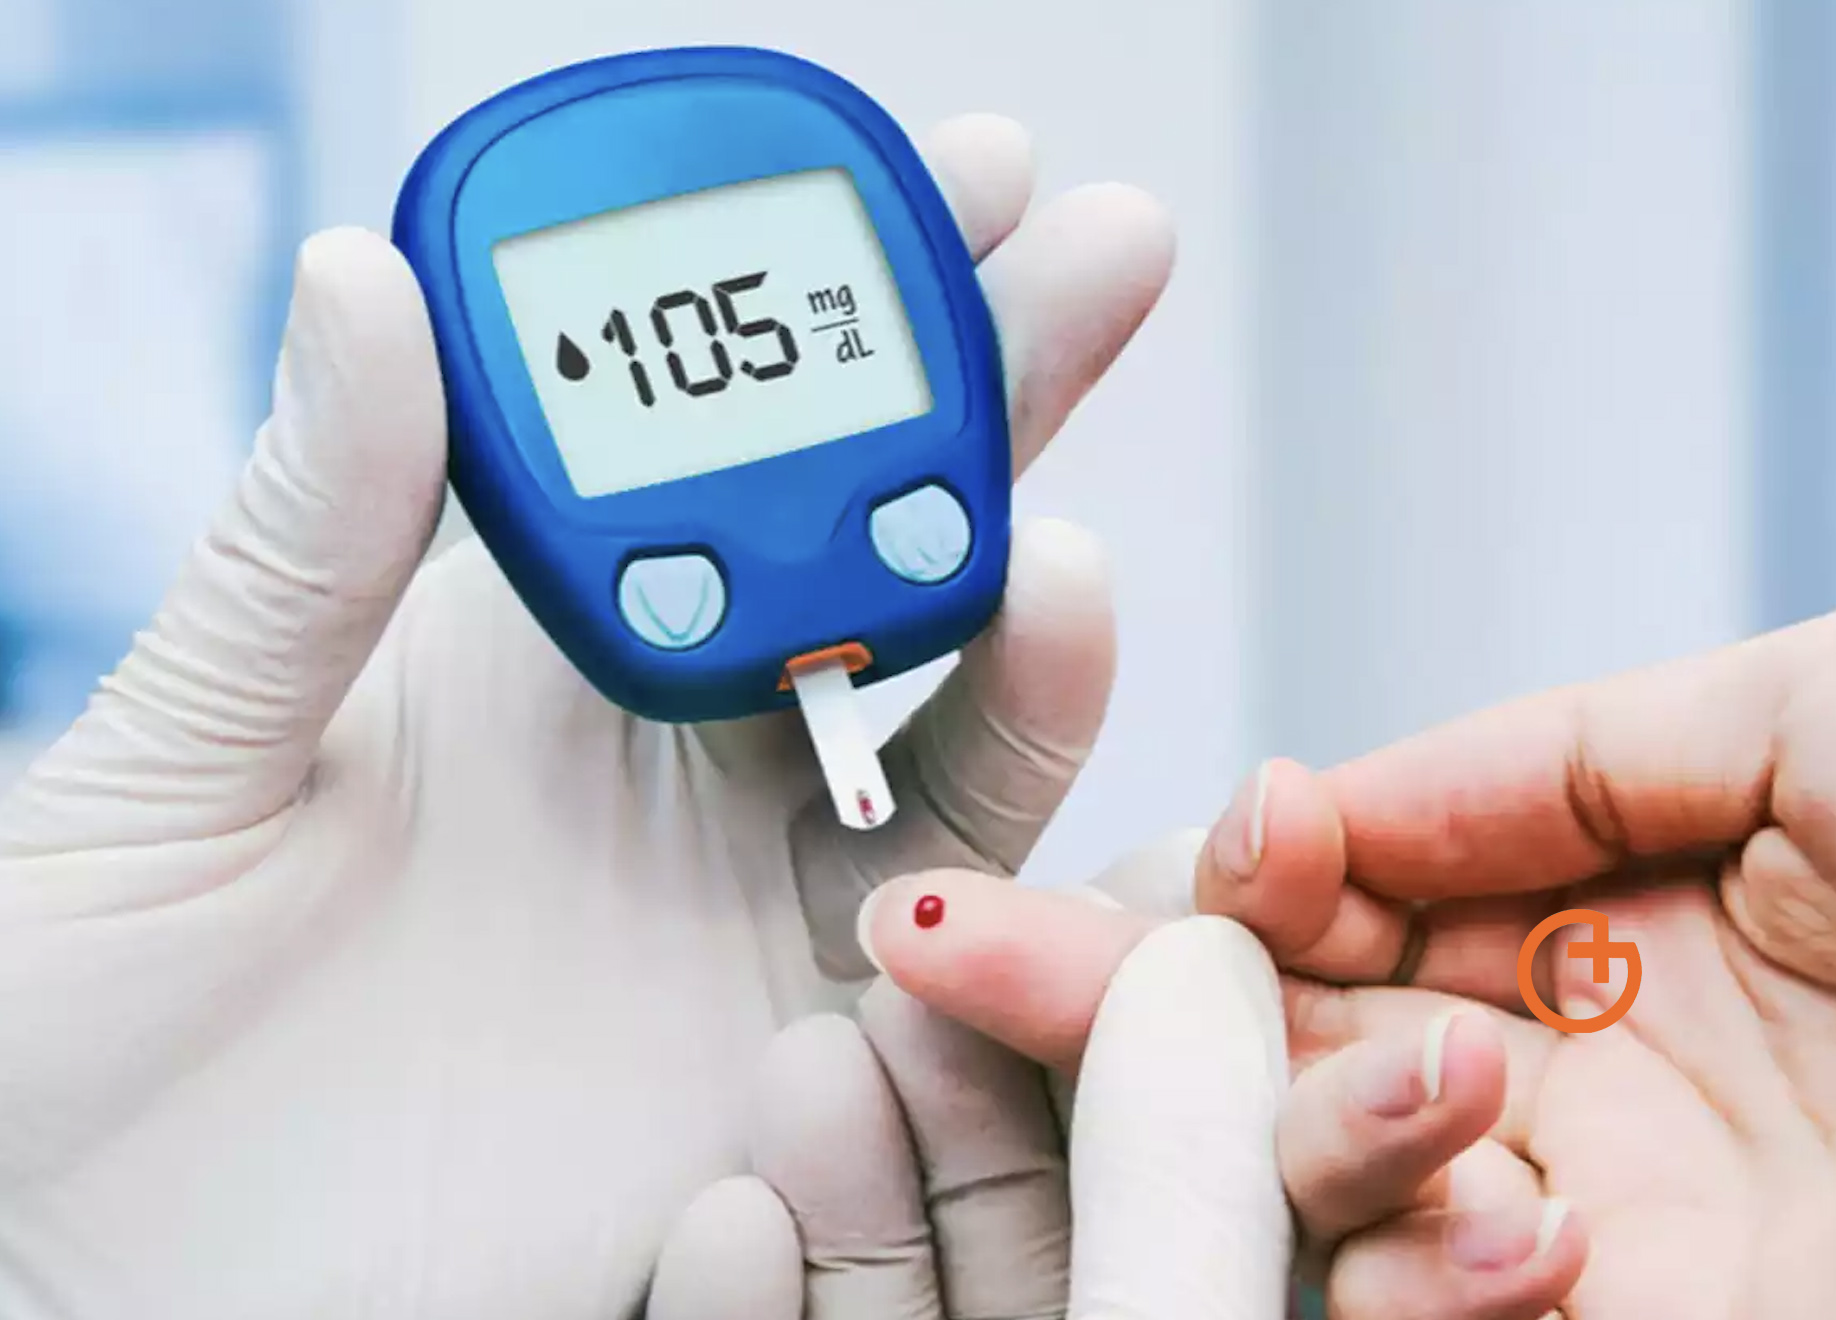

L'objectiu principal d'aquest treball és desenvolupar i avaluar models predictius capaços de classificar si un pacient té diabetis o no, basant-nos en les seves característiques mèdiques i demogràfiques.

**Metodologia:** Per assolir aquest objectiu, utilitzarem un conjunt de dades (dataset) extret de la plataforma Kaggle, que conté informació de 100.000 pacients i 31 atributs diferents.

### 2. Dependencies
- **pandas i numpy:** operacions sobre vectors i matrius de dades.
- **plotly i matplotlib:** generació de gràfics
- **sklearn:** model, mètriques i divisió del conjunt de dades.
- **prettytable:** representa dades en una taula.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# Librerías de Machine Learning (Scikit-Learn)
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

### 3. EDA (Exploratory Data Analysis)
Abans de començar, és fonamental analitzar la base de dades assignada.

In [45]:
df = pd.read_csv('diabetes_dataset.csv')

Un cop hem carregat les nostres dades, podem fer una ullada a quants atributs tenim:

In [46]:
print("La quantitat d'atributs de la base de dades és de:", df.shape[1], "\n")

La quantitat d'atributs de la base de dades és de: 31 



El següent que farem és mostrar alguns exemples de diferents mostres i observar l'estructura de les nostres dades.

In [47]:
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


Ara, fem una ullada al tipus de dades dels atributs:

In [48]:
print("Els diferents tipus d'atributs son els següents:", "\n", df.dtypes, "\n")

Els diferents tipus d'atributs son els següents: 
 age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total            

La llista resultant mostra alguns tipus d'atributs que s'han de redefinir per processar-los correctament: gender, ethnicity, education_level, income_level, employment_status, smoking_status y diabetes_stage.

Observem una mica d'informació sobre els nostres atributs numèrics:

In [49]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


Podem observar que la mitjana de l'objectiu que és "diagnosed_diabetes" és de 0,59, la qual cosa indica que no està balancejada.

L'última cosa a fer en la nostra exploració de dades és cercar els missing values:

In [50]:
missing_values_table = PrettyTable()

missing_values_table.field_names = ["Attribute", "Missing values"]

for attribute, count in df.isnull().sum().items():
    missing_values_table.add_row([attribute, count])
    
print(missing_values_table)

+------------------------------------+----------------+
|             Attribute              | Missing values |
+------------------------------------+----------------+
|                age                 |       0        |
|               gender               |       0        |
|             ethnicity              |       0        |
|          education_level           |       0        |
|            income_level            |       0        |
|         employment_status          |       0        |
|           smoking_status           |       0        |
|    alcohol_consumption_per_week    |       0        |
| physical_activity_minutes_per_week |       0        |
|             diet_score             |       0        |
|        sleep_hours_per_day         |       0        |
|     screen_time_hours_per_day      |       0        |
|      family_history_diabetes       |       0        |
|        hypertension_history        |       0        |
|       cardiovascular_history       |       0  

La taula mostrada revela que no hi ha missing values al nostre conjunt de dades, la qual cosa és perfecte ja que ens facilitarà molt la feina.

### 4. Anàlisi de dades

El primer que farem es comprovar si el target del nostre dataset esta balancejat



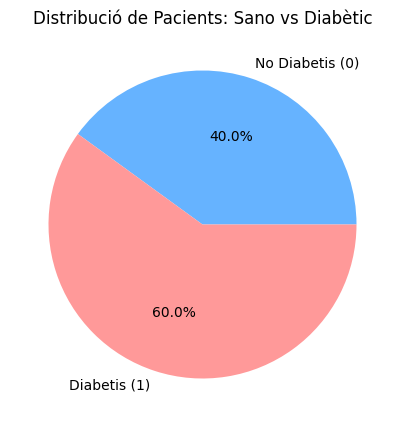

In [51]:
# 1. Distribució de la variable objectiu
plt.figure(figsize=(6, 5))
# Usem un gràfic de pastís per veure percentatges clars
counts = df['diagnosed_diabetes'].value_counts().sort_index()
plt.pie(counts, labels=['No Diabetis (0)', 'Diabetis (1)'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Distribució de Pacients: Sano vs Diabètic')
plt.show()

Observem que el dataset està balancejat ja que tenim una distribució de 40-60 entre sans i malalts.

També pot resultar interesant veure si el gènere de els pacients està correctament balancejat i si té alguna influencia en tenir diabetis o no.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30024\3743154868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=df, palette='pastel')


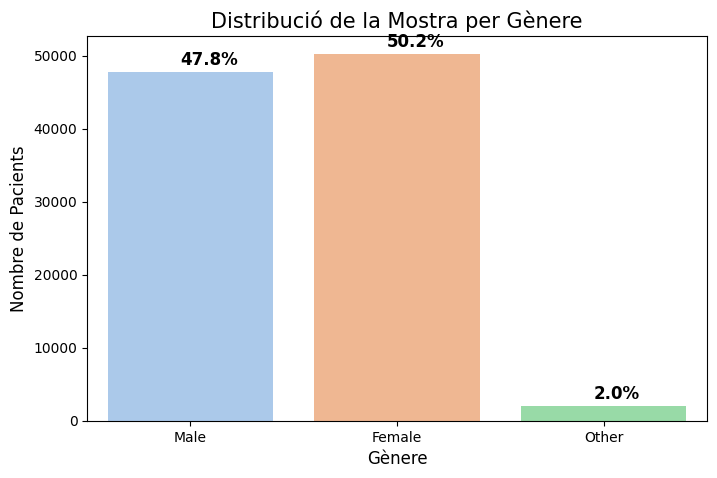

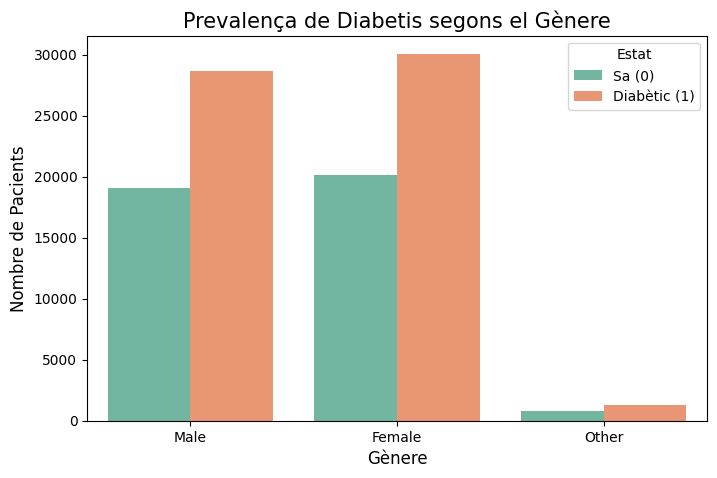

In [52]:
# --- Gràfic de Distribució per Gènere ---
plt.figure(figsize=(8, 5))

# Creem el gràfic de barres (Countplot)
ax = sns.countplot(x='gender', data=df, palette='pastel')

# Títols i etiquetes
plt.title('Distribució de la Mostra per Gènere', fontsize=15)
plt.xlabel('Gènere', fontsize=12)
plt.ylabel('Nombre de Pacients', fontsize=12)

# Afegeix els percentatges a sobre de les barres
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + (total * 0.01) # Un petit marge cap amunt
    ax.annotate(percentage, (x, y), size=12, weight='bold')

plt.show()



# --- Gràfic Gènere vs Diabetis ---
plt.figure(figsize=(8, 5))

# Usem 'hue' per separar els colors segons si tenen diabetis o no
sns.countplot(x='gender', hue='diagnosed_diabetes', data=df, palette='Set2')

plt.title('Prevalença de Diabetis segons el Gènere', fontsize=15)
plt.xlabel('Gènere', fontsize=12)
plt.ylabel('Nombre de Pacients', fontsize=12)
plt.legend(title='Estat', labels=['Sa (0)', 'Diabètic (1)'])

plt.show()

Com podem observar en el gràfic de distribució, la mostra està força equilibrada entre homes i dones. Tanmateix, en analitzar la prevalença de la malaltia segons el gènere (gràfic 2), s’observa que aquest no sembla ser un factor determinant, ja que la prevalença és molt similar en ambdós grups.

Un altre atribut d’interès és la distribució del nombre de pacients segons la seva ètnia, així com l’anàlisi de si existeix alguna possible correlació entre l’ètnia i el diagnòstic de diabetis.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30024\351932938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ethnicity', data=df, palette='pastel', order=order)


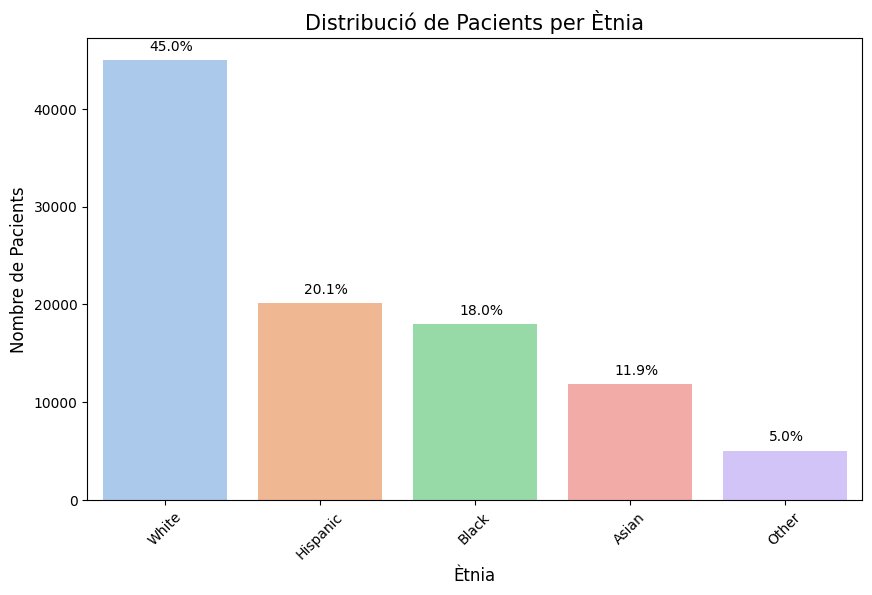

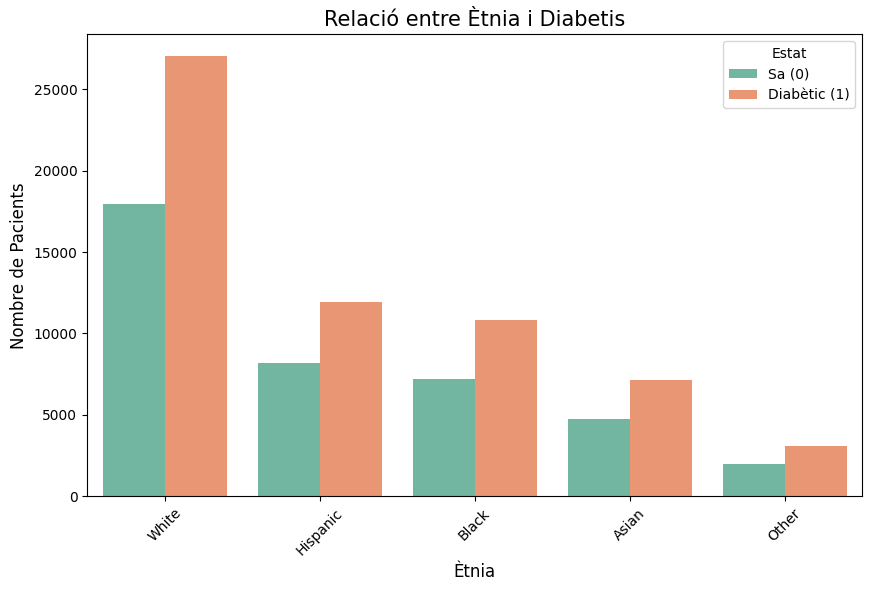

Percentatge de Diabetis per grup ètnic:
diagnosed_diabetes          0          1
ethnicity                               
Asian               39.924147  60.075853
Black               39.858779  60.141221
Hispanic            40.605880  59.394120
Other               39.235492  60.764508
White               39.895993  60.104007


In [53]:
# --- Gràfic de Distribució per Ètnia ---
plt.figure(figsize=(10, 6))

order = df['ethnicity'].value_counts().index
ax = sns.countplot(x='ethnicity', data=df, palette='pastel', order=order)

plt.title('Distribució de Pacients per Ètnia', fontsize=15)
plt.xlabel('Ètnia', fontsize=12)
plt.ylabel('Nombre de Pacients', fontsize=12)
plt.xticks(rotation=45) # Girem les etiquetes perquè es llegeixin bé

# Afegim percentatges
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0: # Evitar errors amb barres buides
        percentage = '{:.1f}%'.format(100 * height/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = height + (total * 0.01)
        ax.annotate(percentage, (x, y), size=10)

plt.show()

# --- Gràfic Ètnia vs Diabetis ---
plt.figure(figsize=(10, 6))

sns.countplot(x='ethnicity', hue='diagnosed_diabetes', data=df, palette='Set2', order=order)

plt.title('Relació entre Ètnia i Diabetis', fontsize=15)
plt.xlabel('Ètnia', fontsize=12)
plt.ylabel('Nombre de Pacients', fontsize=12)
plt.legend(title='Estat', labels=['Sa (0)', 'Diabètic (1)'])
plt.xticks(rotation=45)

plt.show()

# Taula de percentatges exactes
print("Percentatge de Diabetis per grup ètnic:")
print(pd.crosstab(df['ethnicity'], df['diagnosed_diabetes'], normalize='index') * 100)

Analitzant la variable ètnica, observem que, tot i que la majoria de la mostra pertany al grup 'White' (Blanc), la proporció de casos de diabetis es manté constant al voltant del 60% en tots els grups demogràfics (asiàtics, negres, hispans, etc.). Aquest comportament homogeni ens indica que, en aquest conjunt de dades específic, l'ètnia no actua com a factor de risc determinant.

D'altra banda, la literatura mèdica habitualment considera el nivell socioeconòmic (income_level) com un factor de risc indirecte però rellevant, ja que sol estar estretament lligat a la qualitat de l'alimentació i a l'accés a cures preventives. A continuació, verificarem si aquesta correlació clàssica es manté en el nostre conjunt de dades o si, per contra, la malaltia es distribueix de manera transversal.

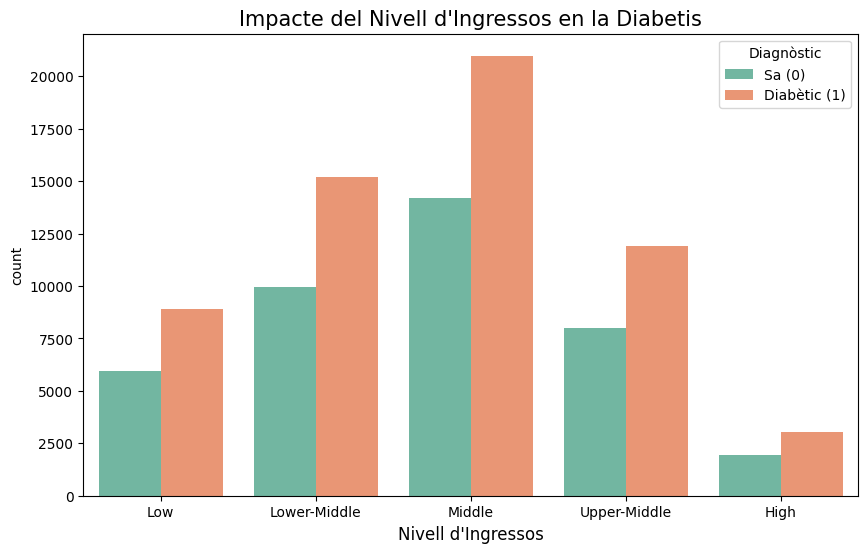

diagnosed_diabetes          0          1
income_level                            
High                39.284286  60.715714
Low                 39.946055  60.053945
Lower-Middle        39.614314  60.385686
Middle              40.330564  59.669436
Upper-Middle        40.133897  59.866103


In [54]:
# --- Gràfic Nivell d'Ingressos ---
plt.figure(figsize=(10, 6))

# Ordenem lògicament els nivells (no alfabèticament)
ordre_ingressos = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']

sns.countplot(x='income_level', hue='diagnosed_diabetes', data=df, order=ordre_ingressos, palette='Set2')

plt.title('Impacte del Nivell d\'Ingressos en la Diabetis', fontsize=15)
plt.xlabel('Nivell d\'Ingressos', fontsize=12)
plt.legend(title='Diagnòstic', labels=['Sa (0)', 'Diabètic (1)'])

plt.show()

# Comprovació numèrica
print(pd.crosstab(df['income_level'], df['diagnosed_diabetes'], normalize='index') * 100)

L'anàlisi de les dades refuta la nostra hipòtesi per a aquest dataset concret. Observem que la proporció de casos positius es manté constant al voltant del 60% independentment del nivell d'ingressos. Per tant, podem concloure que aquesta variable no aportarà poder predictiu al model, i el pes de la predicció recaurà totalment en els marcadors biològics.


Un cop hem vist que les dades demogràfiques (gènere, ètnia, ingressos) no són determinants, passem a analitzar les variables mèdiques. Fem servir un Mapa de Correlació per identificar ràpidament quins indicadors tenen una relació matemàtica més forta amb el diagnòstic de diabetis.

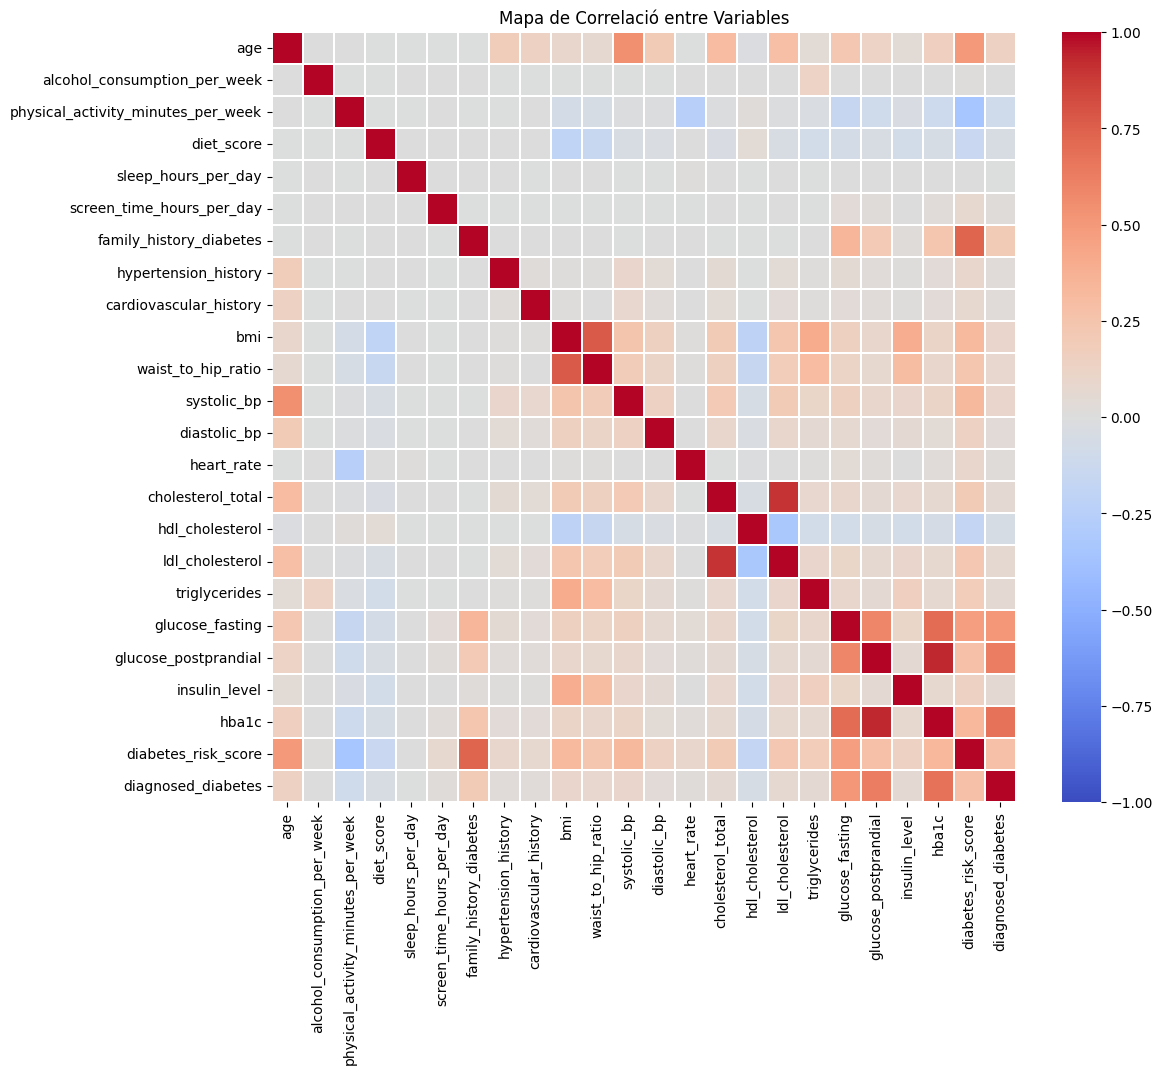

In [55]:
# 2. Mapa de Correlació
# Seleccionem només les columnes numèriques per evitar errors
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', linewidths=0.1, vmin=-1, vmax=1)
plt.title('Mapa de Correlació entre Variables')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30024\1219826813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosed_diabetes', y='glucose_fasting', data=df, ax=axes[0, 0], palette="Set2")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30024\1219826813.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosed_diabetes', y='glucose_postprandial', data=df, ax=axes[0, 1], palette="Set2")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30024\1219826813.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosed_diabetes', y

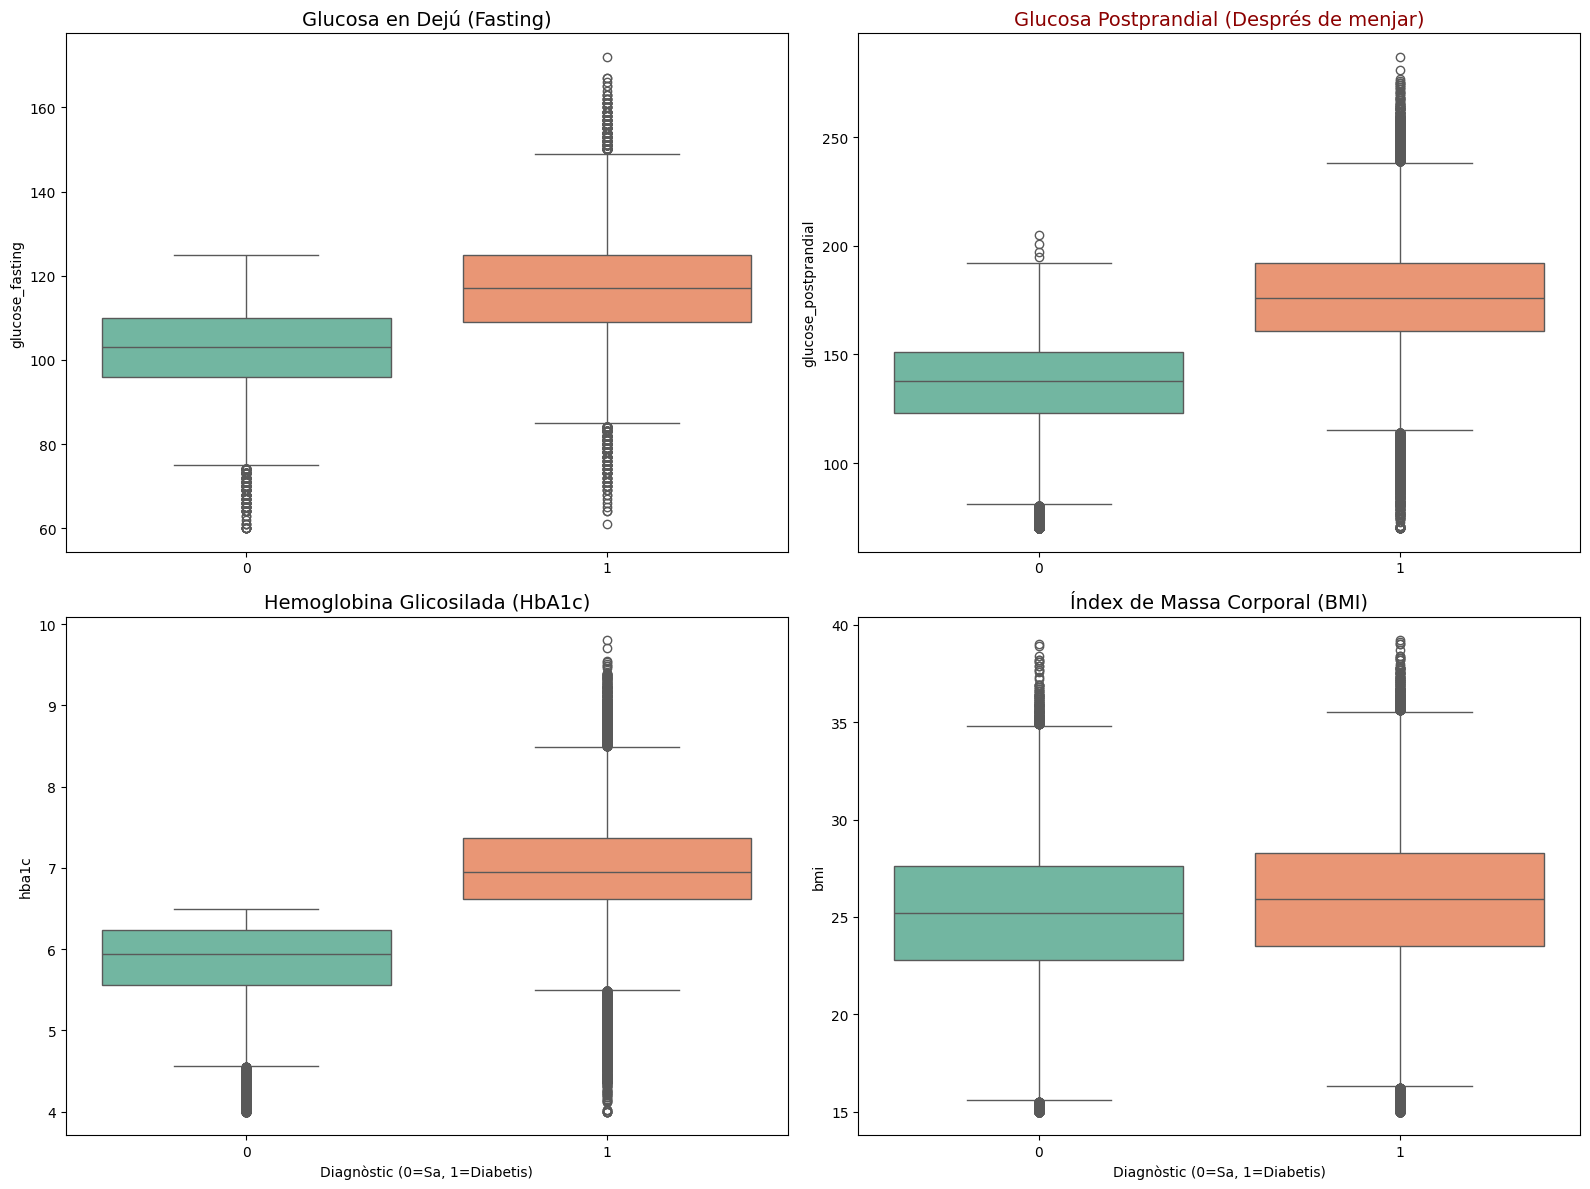

In [56]:
# --- Visualització de les 4 Variables Mèdiques Clau ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Glucosa en Dejú
sns.boxplot(x='diagnosed_diabetes', y='glucose_fasting', data=df, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('Glucosa en Dejú (Fasting)', fontsize=14)
axes[0, 0].set_xlabel('')

# 2. Glucosa Postprandial (NOVA)
sns.boxplot(x='diagnosed_diabetes', y='glucose_postprandial', data=df, ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title('Glucosa Postprandial (Després de menjar)', fontsize=14, color='darkred')
axes[0, 1].set_xlabel('')

# 3. HbA1c
sns.boxplot(x='diagnosed_diabetes', y='hba1c', data=df, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('Hemoglobina Glicosilada (HbA1c)', fontsize=14)
axes[1, 0].set_xlabel('Diagnòstic (0=Sa, 1=Diabetis)')

# 4. BMI
sns.boxplot(x='diagnosed_diabetes', y='bmi', data=df, ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title('Índex de Massa Corporal (BMI)', fontsize=14)
axes[1, 1].set_xlabel('Diagnòstic (0=Sa, 1=Diabetis)')

plt.tight_layout()
plt.show()

Gràcies al mapa de calor i als Boxplots, podem extreure les conclusions següents:

- **Les variables clau:** La glucose_fasting (glucosa en dejú), la glucose_postprandial (després de menjar) i l'hba1c són els millors predictors. Tenen una correlació molt alta (>0.60).

- **Diferència visual clara:** Els gràfics mostren que els pacients diabètics tenen nivells molt més alts en aquestes tres variables que els sans.

- **Sense solapament:** Les "caixes" dels sans i dels malalts gairebé no es toquen. Això és una notícia excel·lent, perquè significa que el model ho tindrà molt fàcil per separar els dos grups i encertar el diagnòstic."

### 5. Preprocessament de les Dades

Un cop analitzades les nostres dades, hem de realitzar tres transformacions crítiques per preparar-les per l'entrenament dels models.

- **Eliminació de variables redundants:** Les columnes diabetes_stage i diabetes_risk_score contenen la resposta implícita (ex: "Type 2" implica diabetis), per la qual cosa les hem d'eliminar per evitar que el model faci "trampa" (data leakage).

- **Codificació de variables categòriques:** Els models matemàtics no entenen text com "Male" o "Female". Utilitzarem la tècnica One-Hot Encoding per convertir aquestes etiquetes en números binaris (0 i 1).

- **Escalat de dades:** Com que tenim variables amb magnituds molt diferents (ex: glucose vs bmi), aplicarem una estandardització (StandardScaler) perquè totes tinguin el mateix pes inicial."

El primer que farem és el·liminar les columnes "diabetes_stage" i "diabetes_risk_score" ja que aquestes poden produir "Data Leakage".

In [61]:
if 'diabetes_stage' in df.columns:
    df_clean = df.drop(['diabetes_stage', 'diabetes_risk_score'], axis=1)
else:
    df_clean = df.copy()

Posteriorment el que farem és transformar les nostres dades de text a nombres.

In [59]:
df_preprocessed = pd.get_dummies(df_clean, drop_first=True)

print("Dimensions originals:", df.shape)
print("Dimensions després del preprocessament:", df_preprocessed.shape)
print("\nPrimeres files de les dades transformades:")
display(df_preprocessed.head())

Dimensions originals: (100000, 31)
Dimensions després del preprocessament: (100000, 41)

Primeres files de les dades transformades:


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,False,False,True,False,False,False,False,False,False,True
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,False,False,False,True,False,False,False,False,True,False
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,False,False,False,True,False,False,False,True,False,True
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,False,True,False,False,False,True,False,False,False,True
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,False,False,False,True,False,True,False,False,False,True


Per a la transformació de les variables categòriques, hem optat per la tècnica de One-Hot Encoding en lloc del Label Encoding.

Aquesta decisió es justifica per la naturalesa de les nostres dades: variables com l'ètnia (ethnicity) o el gènere (gender) són nominals i no presenten cap jerarquia. Si utilitzéssim Label Encoding (assignant 0, 1, 2...), models basats en equacions lineals com la Regressió Logística interpretarien erròniament aquests valors com a magnituds (assumint que l'ètnia 2 és "superior" a l'ètnia 1), la qual cosa introduiria un biaix matemàtic. El One-Hot Encoding elimina aquest risc tractant cada categoria de forma independent.

Una vegada hem fet aquesta transformació el seguent pas és diferenciar l'atribut que volem predir de la resta.

In [62]:
target_col = 'diagnosed_diabetes'
X = df_preprocessed.drop(target_col, axis=1)
y = df_preprocessed[target_col]

El seguent pas és dividir les nostres dades en dos conjunts diferents, un per entrenar el model i l'altre per fer proves.

L’ús del paràmetre stratify = y és vital en aquest procés, ja que permet mantenir la proporció aproximada del 60/40 entre pacients malalts i sans en ambdós conjunts.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Per últim el que farem és escalar les dades d'entrenament.

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Entrenament dels models

Per a aquest problema crearem 2 models diferents i els compararem.

#### 6.1 Regresió Logística

És l'enfocament estadístic clàssic. Busca una línia matemàtica que separi pacients sans i malalts.

El primer que fem és definir el model.

In [65]:
log_model = LogisticRegression(random_state=42, max_iter=1000)

Trobarem quins són els millors paràmetres per al nostre model:

In [66]:
# 1. Definim els paràmetres a provar
parameters_log = dict(
    C=[0.01, 0.1, 1, 10, 100],
    penalty=['l2']  # 'l2' es el estándar matemático
)

# 2. Configurem la cerca (GridSearchCV)
grid_log = GridSearchCV(
    estimator=log_model,
    param_grid=parameters_log,
    scoring='accuracy',
    cv=3
)

# 3. Entrenem
print("Buscando los mejores parámetros para Regresión Logística...")
grid_log.fit(X_train_scaled, y_train)

# 4. Resultats
print("Mejores parámetros:", grid_log.best_params_)

Buscando los mejores parámetros para Regresión Logística...
Mejores parámetros: {'C': 10, 'penalty': 'l2'}


Un cop coneixem els paràmetres que s'adapten millor al nostre model, podem entrenar el model:

In [22]:
best_log_model = grid_log.best_estimator_

Després d'entrenar el model, predirem el conjunt de proves:

In [23]:
y_pred_log = best_log_model.predict(X_test_scaled)

Finalment podem avaluar el model:

In [37]:
log_accuracy = accuracy_score(y_test, y_pred_log)
y_pred_train_log = best_log_model.predict(X_train_scaled)
log_train_acc = accuracy_score(y_train, y_pred_train_log)

print("--- REGRESIÓ LOGÍSTICA ---")
print(f"Accuracy: {log_accuracy:.4f}")

print(" ")

print("--- Comprobació d'Overfitting (Regresió Logística) ---")
print(f"Accuracy en Train:  {log_train_acc:.4f}")
print(f"Accuracy en Test:  {log_accuracy:.4f}")

--- REGRESIÓ LOGÍSTICA ---
Accuracy: 0.8609
 
--- Comprobació d'Overfitting (Regresió Logística) ---
Accuracy en Train:  0.8591
Accuracy en Test:  0.8609


En aquests resultats podem veure com el model prediu força bé amb una precisió de 0,8609.

#### 6.2 Random Forest

És un enfocament més modern que crea multitud d'"arbres de decisió" i fa una votació final. Sol ser més potent.

Començarem per definir-ho:

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

Utilitzarem una tècnica de selecció de models proporcionada per la biblioteca sklearn anomenada GridSearchCV que troba quina combinació de paràmetres s'adapta millor al model.

In [38]:
parameters = dict(
    n_estimators=[50, 100, 200],      
    max_depth=[None, 10, 20],         
    criterion=['gini', 'entropy']     
)

grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=parameters,
    scoring='accuracy',  
    cv=3,   
    n_jobs=-1,    # <--- CLAVE: Usa todos los núcleos de tu CPU
    verbose=2     # <--- CLAVE: Te muestra el progreso en tiempo real
)


grid_rf.fit(X_train, y_train) #entrenem

print("Millors paràmetres:", grid_rf.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Millors paràmetres: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}


Un cop coneixem els paràmetres que s'adapten millor al nostre model, podem entrenar el model:

In [39]:
best_rf_model = grid_rf.best_estimator_

Després d'entrenar el model, predirem el conjunt de proves:

In [40]:
y_pred_rf = best_rf_model.predict(X_test)

Finalment podem avaluar el model:

In [42]:
print("\n--- RESULTATS: RANDOM FOREST ---")
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisió (Accuracy): {acc_rf:.4f}")

# Comprobació d'Overfitting
print("--- Comprobació d'Overfitting (Random Forest) ---")

print(f"Accuracy en Test: {grid_rf.score(X_test, y_test):.4f}")
print(f"Accuracy en Train: {grid_rf.score(X_train, y_train):.4f}")


--- RESULTATS: RANDOM FOREST ---
Precisió (Accuracy): 0.9198
--- Comprobació d'Overfitting (Random Forest) ---
Accuracy en Test: 0.9198
Accuracy en Train: 0.9217


En aquests resultats podem veure com el model prediu força bé amb una precisió de 0,9198 i per tant es robust i fiable.

### 7. Comparació de models

Després de crear i provar els dos models, és hora de posar en comú i comparar els resultats

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30024\3075749049.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=df_comparativa, palette='viridis')


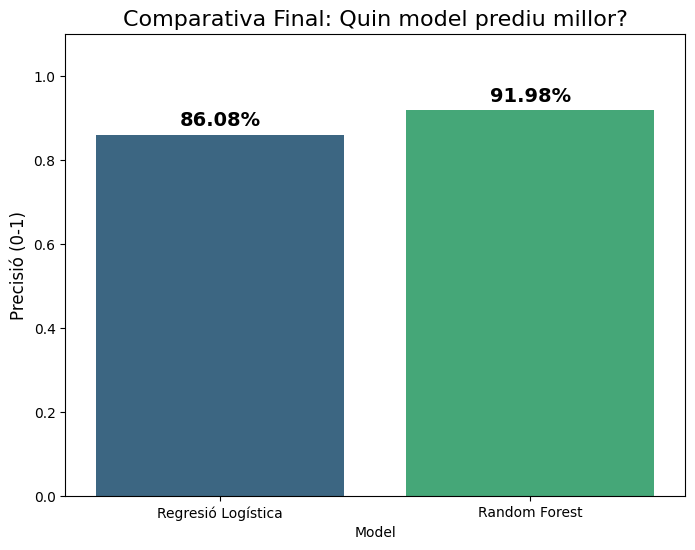

In [72]:
# 1. Definim les dades 
modelos = ['Regresió Logística', 'Random Forest']
precisiones = [log_accuracy, acc_rf]

# Creem un DataFrame per el gràfic
df_comparativa = pd.DataFrame({
    'Model': modelos,
    'Accuracy': precisiones
})

# 2. Fem el gràfic
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=df_comparativa, palette='viridis')

# 3. Ponemos los títulos
plt.title('Comparativa Final: Quin model prediu millor?', fontsize=16)
plt.ylabel('Precisió (0-1)', fontsize=12)
plt.ylim(0, 1.1)  # Dejamos espacio arriba para los números

# 4. Magia: Escribir el % exacto encima de cada barra
for p in ax.patches:
    porcentaje = f'{p.get_height():.2%}'  # Convertir 0.92 a "92.00%"
    ax.annotate(porcentaje, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=14, weight='bold', color='black')

plt.show()

El gràfic comparatiu és definitiu:

- El Random Forest és clarament superior, amb una precisió del 92% (barra verda).

- La Regressió Logística, tot i ser un bon model base, es queda en un 86%.

Aquesta diferència visual del 6% confirma que per predir la diabetis necessitem la capacitat del Random Forest per trobar relacions complexes entre les anàlisis de sang (HbA1c, Glucosa) i l'edat, superant les limitacions dels models lineals clàssics.

### 8. Conclusions

Després de processar, entrenar i avaluar dos models diferents amb un conjunt de 100.000 pacients, podem extreure les següents conclusions clau:

1. **Rendiment dels Models: Victòria del Random Forest**

    Els resultats són clars:
    - Random Forest: Ha assolit una precisió del 92%. La seva capacitat per gestionar relacions no lineals i complexes entre variables l'ha convertit en l'opció superior.

    - Regressió Logística: S'ha quedat en un 86%. Tot i ser un model robust i fàcil d'interpretar, la seva naturalesa lineal li ha impedit captar tots els matisos de la malaltia.

2. **Anàlisi d'Overfitting (Sobreajust)**

    Els resultats mostren una estabilitat excel·lent:

    - La diferència de precisió entre el conjunt d'entrenament (Train) i el de prova (Test) és mínima (< 0.2% en el cas del Random Forest).

    - Això confirma que el model és fiable i generalitzable: no està sobreajustat i es pot confiar en ell per fer prediccions sobre nous pacients reals.

3. **Factors Determinants (Biomarcadors)**

   
    El model ha identificat clarament quins són els indicadors d'alerta més forts:

    - L'HbA1c (Hemoglobina Glicosilada) i els nivells de Glucosa (tant en dejú com postprandial) són, amb molta diferència, les variables més importants.

    - Factors demogràfics com l'educació o el nivell d'ingressos han demostrat tenir un impacte marginal o nul en la predicció directa de la malaltia.